### Part 1 - Import de todas as bibliotecas necessárias 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

### Part 2 - Leitura do local dataframe + informações básicas

In [2]:
df = pd.read_csv('RTA Dataset.csv')
pd.set_option('display.max_columns', None)

df_1 = df.copy()
df_2 = df.copy()
df_3 = df.copy()
df_4 = df.copy()

In [3]:
# descrever categorical columns
df.describe(include = 'object')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,7889,12077,11931,12174,11429,12144,12316,12316,12316,12161,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,3,14,7,9,8,5,4,4,9,10,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,7777,3819,4411,10459,4543,11296,9340,8798,10063,8774,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [4]:
df.isnull().sum()   #verificar quantas colunas têm valores nulos

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

### Part 3 - pre processing - divisão de experiências

 *  exp 1 - distribuir a proporção dos valores nulos (>4000) pelos restantes valores, mantendo a proporção
 *  exp 2 - eliminar colunas com valores nulos > 3500
 *  exp 3 - substituir valores nulos por valores em que a coluna da gravidade é a mesma (tendo em conta a sua moda)
 *  exp 4 - aplicar método do KNN às colunas com valores nulos

Antes de repartir em experiências, vamos analisar o que significam algumas colunas que aparentam não ser tão importantes para a nossa análise, eliminando-as de qualquer experiência

In [5]:
type_of_vehicle = df['Type_of_vehicle'].value_counts()    #ELIMINAR COM CERTEZA -> irrelevante
print(type_of_vehicle, "\n\n")

owner_of_vehicle = df['Owner_of_vehicle'].value_counts()  #ELIMINAR COM CERTEZA -> irrelevante
print(owner_of_vehicle, "\n\n")

service_year_of_vehicle = df['Service_year_of_vehicle'].value_counts()    #ELIMINAR COM CERTEZA -> muitos nans
print(service_year_of_vehicle, "\n\n")

defect_of_vehicle = df['Defect_of_vehicle'].value_counts()  #tem 7777 "no defect"
print(defect_of_vehicle, "\n\n")    #ELIMINAR -> DADOS CONFUSOS

area_accident_occured = df['Area_accident_occured'].value_counts() #ELIMINAR -> IRRELEVANTE
print(area_accident_occured, "\n\n")

road_allignment = df['Road_allignment'].value_counts()  #ELIMINAR -> muitos dados iguais -> +80%  
print(road_allignment, "\n\n")

pedestrian_movement = df['Pedestrian_movement'].value_counts()  #ELIMINAR -> dados sem sentido
print(pedestrian_movement, "\n\n")

fitness_of_casuality = df['Fitness_of_casuality'].value_counts()  #ELIMINAR -> faltam dados e muitos iguais
print(fitness_of_casuality, "\n\n")

work_of_causalty = df['Work_of_casuality'].value_counts()
print(work_of_causalty, "\n\n")

casualty_class = df['Casualty_class'].value_counts()  #ELIMINAR -> ver matriz de correlação
print(casualty_class, "\n\n")

Type_of_vehicle
Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: count, dtype: int64 


Owner_of_vehicle
Owner           10459
Governmental     1041
Organization      312
Other              22
Name: count, dtype: int64 


Service_year_of_vehicle
Unknown       2883
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: count, dtype: int64 


Defect_of_vehicle
No defect    7777
7              76
5              36
Name: count, dtype: int64 


Area_accident_occured
Other                              381

Após a análise, eliminamos as colunas que afetam pouco a nossa saída, que, como sabemos, é a última coluna: "Gravidade do Acidente"

In [6]:
colunas_a_eliminar = ['Type_of_vehicle', 'Owner_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured',
                      'Road_allignment', 'Pedestrian_movement', 'Fitness_of_casuality', 'Work_of_casuality', 'Time', 'Day_of_week']

df.drop(colunas_a_eliminar, axis = 1, inplace = True)

Agora, para uma melhor compreensão da tabela, vamos renomear as colunas

In [7]:
#time, day_of_week, age_band_of_driver, sex_of_driver, educational_level, vehicle_driver_relation, driving_experience
#type_of_vehicle, owner_of_vehicle, service_year_of_vehicle, defect_of_vehicle, area_accident_occured
#lanes_or_medians, road_allignment, types_of_junction, road_surface_type, road_surface_conditions, ligh_conditions
#weather_conditions, type_of_collision, number_of_vehicles_involved, number_of_casualties, vehicle_movement
#casualty_class, sex_of_casualty, age_band_of_casualty, casualty_severity, work_of_casualty, fitness_of_casualty
#pedestrian_movement, cause_of_accident, accident_severity,
colunas_renomeadas = ['Faixa Etária', 'Género', 'Nível de Educação', 'Relação com o Veículo', 
                      'Experiência de Condução', 'Idade do Veículo', 'Situação de Faixa', 'Tipo de Cruzamento',
                      'Tipo de Estrada', 'Condições do Piso', 'Condições de Visibilidade',
                      'Condiçoes Meteorológicas', 'Tipo de Colisão', 'N.º Veículos Envolvidos',
                      'Número de Vítimas', 'Movimento do Veículo', 'Tipo de Vítima','Género da Vítima',
                      'Faixa Etária da Vítima', 'Gravidade da Vítima',
                      'Causa do Acidente', 'Gravidade do Acidente']

df.columns = colunas_renomeadas
df.head()

,Faixa Etária,Género,Nível de Educação,Relação com o Veículo,Experiência de Condução,Idade do Veículo,Situação de Faixa,Tipo de Cruzamento,Tipo de Estrada,Condições do Piso,Condições de Visibilidade,Condiçoes Meteorológicas,Tipo de Colisão,N.º Veículos Envolvidos,Número de Vítimas,Movimento do Veículo,Tipo de Vítima,Género da Vítima,Faixa Etária da Vítima,Gravidade da Vítima,Causa do Acidente,Gravidade do Acidente
0,18-30,Male,Above high school,Employee,1-2yr,Above 10yr,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,Moving Backward,Slight Injury
1,31-50,Male,Junior high school,Employee,Above 10yr,5-10yrs,Undivided Two way,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,Overtaking,Slight Injury
2,18-30,Male,Junior high school,Employee,1-2yr,NaN,other,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Changing lane to the left,Serious Injury
3,18-30,Male,Junior high school,Employee,5-10yr,NaN,other,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Changing lane to the right,Slight Injury
4,18-30,Male,Junior high school,Employee,2-5yr,5-10yrs,other,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,Overtaking,Slight Injury


Vamos agora perceber quantos valores nulos existem e ainda realizar a substituição desses mesmos pela moda da coluna.

Neste passo, fomos apenar substituir os valores nulos cujas colunas tinham menos de 1000 valores "NaN", uma vez que afeta pouco a proporção dos valores, servindo de base a todas as experiências

In [8]:
df.replace('na', pd.NA, inplace=True) # substituir "na" por um valor realmente nulo
df.isnull().sum()

df_sem_nulos = df.dropna(axis=1)

df_sem_nulos

,Faixa Etária,Género,Condições do Piso,Condições de Visibilidade,Condiçoes Meteorológicas,N.º Veículos Envolvidos,Número de Vítimas,Causa do Acidente,Gravidade do Acidente
0,18-30,Male,Dry,Daylight,Normal,2,2,Moving Backward,Slight Injury
1,31-50,Male,Dry,Daylight,Normal,2,2,Overtaking,Slight Injury
2,18-30,Male,Dry,Daylight,Normal,2,2,Changing lane to the left,Serious Injury
3,18-30,Male,Dry,Darkness - lights lit,Normal,2,2,Changing lane to the right,Slight Injury
4,18-30,Male,Dry,Darkness - lights lit,Normal,2,2,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,Dry,Daylight,Normal,2,1,No distancing,Slight Injury
12312,Unknown,Male,Dry,Daylight,Normal,2,1,No distancing,Slight Injury
12313,Over 51,Male,Dry,Daylight,Normal,1,1,Changing lane to the right,Serious Injury
12314,18-30,Female,Dry,Darkness - lights lit,Normal,2,1,Driving under the influence of drugs,Slight Injury


In [9]:
df['Nível de Educação'] = df['Nível de Educação'].fillna(df['Nível de Educação'].mode()[0])
df['Relação com o Veículo'] = df['Relação com o Veículo'].fillna(df['Relação com o Veículo'].mode()[0])
df['Experiência de Condução'] = df['Experiência de Condução'].fillna(df['Experiência de Condução'].mode()[0])
df['Situação de Faixa'] = df['Situação de Faixa'].fillna(df['Situação de Faixa'].mode()[0])
df['Tipo de Cruzamento'] = df['Tipo de Cruzamento'].fillna(df['Tipo de Cruzamento'].mode()[0])
df['Tipo de Estrada'] = df['Tipo de Estrada'].fillna(df['Tipo de Estrada'].mode()[0])
df['Tipo de Colisão'] = df['Tipo de Colisão'].fillna(df['Tipo de Colisão'].mode()[0])
df['Movimento do Veículo'] = df['Movimento do Veículo'].fillna(df['Movimento do Veículo'].mode()[0])

In [10]:
df.isnull().sum()

Faixa Etária                    0
Género                          0
Nível de Educação               0
Relação com o Veículo           0
Experiência de Condução         0
Idade do Veículo             3928
Situação de Faixa               0
Tipo de Cruzamento              0
Tipo de Estrada                 0
Condições do Piso               0
Condições de Visibilidade       0
Condiçoes Meteorológicas        0
Tipo de Colisão                 0
N.º Veículos Envolvidos         0
Número de Vítimas               0
Movimento do Veículo            0
Tipo de Vítima               4443
Género da Vítima             4443
Faixa Etária da Vítima       4443
Gravidade da Vítima          4443
Causa do Acidente               0
Gravidade do Acidente           0
dtype: int64

In [11]:
df_1.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [12]:
df_1 = df.copy()
df_2 = df.copy()
df_3 = df.copy()
df_4 = df.copy()

#### Part 3.1 - distribuir a proporção dos valores nulos

In [13]:
# definimos as colunas que queremos alterar
colunas_a_substituir = ['Idade do Veículo', 'Tipo de Vítima', 'Género da Vítima', 'Faixa Etária da Vítima', 'Gravidade da Vítima']

for coluna in colunas_a_substituir:

    no_valores_nulos = df_1[coluna].isnull().sum()

    # proporção de valores não nulos para cada categoria
    proporcoes_categoria = df_1[coluna].value_counts(normalize = True)

    # calcular o número de valores nulos a serem distribuídos para cada categoria
    distribuicao_nulos = (proporcoes_categoria * no_valores_nulos).round().astype(int)

    # neste caso, damos assign a cada valor nulo de forma RANDOM
    indices_nulo = df_1[df_1[coluna].isnull()].index
    for category, count in distribuicao_nulos.items():
        sample_indices = np.random.choice(indices_nulo, size = count, replace = False)
        df_1.loc[sample_indices, coluna] = category

    # preencher algum valor nulo que falte, RANDOM
    remaining_null_indices = df_1[df_1[coluna].isnull()].index
    remaining_categories = list(proporcoes_categoria.index)
    for index in remaining_null_indices:
        df_1.at[index, coluna] = np.random.choice(remaining_categories)

In [14]:
df_1.isnull().sum()

Faixa Etária                 0
Género                       0
Nível de Educação            0
Relação com o Veículo        0
Experiência de Condução      0
Idade do Veículo             0
Situação de Faixa            0
Tipo de Cruzamento           0
Tipo de Estrada              0
Condições do Piso            0
Condições de Visibilidade    0
Condiçoes Meteorológicas     0
Tipo de Colisão              0
N.º Veículos Envolvidos      0
Número de Vítimas            0
Movimento do Veículo         0
Tipo de Vítima               0
Género da Vítima             0
Faixa Etária da Vítima       0
Gravidade da Vítima          0
Causa do Acidente            0
Gravidade do Acidente        0
dtype: int64

In [15]:
percentage_values = {}
for column in df_1.columns:
    counts = df_1[column].value_counts(normalize = True, dropna = False) * 100
    percentage_values[column] = counts

for column, percentages in percentage_values.items():
    print(percentages)
    print()

Faixa Etária
18-30       34.678467
31-50       33.184475
Over 51     12.869438
Unknown     12.569016
Under 18     6.698603
Name: proportion, dtype: float64

Género
Male       92.862943
Female      5.691783
Unknown     1.445274
Name: proportion, dtype: float64

Nível de Educação
Junior high school    67.879182
Elementary school     17.562520
High school            9.012666
Above high school      2.939266
Writing & reading      1.429035
Unknown                0.811952
Illiterate             0.365378
Name: proportion, dtype: float64

Relação com o Veículo
Employee    82.867814
Owner       16.019812
Other        0.998701
Unknown      0.113673
Name: proportion, dtype: float64

Experiência de Condução
5-10yr        34.037025
2-5yr         21.216304
Above 10yr    18.366353
1-2yr         14.257876
Below 1yr     10.896395
No Licence     0.958103
unknown        0.267944
Name: proportion, dtype: float64

Idade do Veículo
Unknown       30.180253
2-5yrs        20.493667
5-10yrs       16.344592
Abov

#### Part 3.2 - eliminar colunas com valores nulos > 3500

In [16]:
colunas_valores_nulos = ['Idade do Veículo', 'Tipo de Vítima', 'Género da Vítima', 'Faixa Etária da Vítima', 'Gravidade da Vítima']

df_2.drop(colunas_valores_nulos, axis = 1, inplace = True)

In [17]:
df_2.isnull().sum()

Faixa Etária                 0
Género                       0
Nível de Educação            0
Relação com o Veículo        0
Experiência de Condução      0
Situação de Faixa            0
Tipo de Cruzamento           0
Tipo de Estrada              0
Condições do Piso            0
Condições de Visibilidade    0
Condiçoes Meteorológicas     0
Tipo de Colisão              0
N.º Veículos Envolvidos      0
Número de Vítimas            0
Movimento do Veículo         0
Causa do Acidente            0
Gravidade do Acidente        0
dtype: int64

#### Part 3.3 - substituir valores nulos por valores em que a coluna da gravidade é a mesma (tendo em conta a sua moda)

In [18]:
# definimos as colunas que queremos alterar
colunas_a_substituir = ['Idade do Veículo', 'Tipo de Vítima', 'Género da Vítima', 'Faixa Etária da Vítima', 'Gravidade da Vítima']

percentage_values = {}
for column in colunas_a_substituir:
    counts = df_3[column].value_counts(normalize = True, dropna = False) * 100
    percentage_values[column] = counts

for column, percentages in percentage_values.items():
    print(percentages)
    print()

Idade do Veículo
NaN           31.893472
Unknown       23.408574
2-5yrs        14.550179
Above 10yr    10.750244
5-10yrs       10.392985
1-2yr          6.714842
Below 1yr      2.289704
Name: proportion, dtype: float64

Tipo de Vítima
Driver or rider    40.142904
<NA>               36.075024
Pedestrian         13.389087
Passenger          10.392985
Name: proportion, dtype: float64

Género da Vítima
Male      42.651835
<NA>      36.075024
Female    21.273141
Name: proportion, dtype: float64

Faixa Etária da Vítima
<NA>        36.075024
18-30       25.535888
31-50       19.933420
Under 18     8.403703
Over 51      8.070802
5            1.981163
Name: proportion, dtype: float64

Gravidade da Vítima
3       57.453719
<NA>    36.075024
2        6.260149
1        0.211108
Name: proportion, dtype: float64



In [19]:
# Define the target column
target_column = 'Gravidade do Acidente'

# Iterate over each column with null values
for column in colunas_a_substituir:
    
    # Calculate the proportions of each value in the column for each category in the target column
    proportions = df_3.groupby(target_column)[column].value_counts(normalize=True)
    
    # For each null value in the column, replace it based on the proportions
    for index, row in df_3[df_3[column].isnull()].iterrows():
        
        # Get the proportions for the target value of this row
        target_value = row[target_column]
        target_proportions = proportions[target_value]
        
        # Sample from the proportions to replace the null value
        new_value = target_proportions.sample(weights=target_proportions).index[0]
        
        # Replace the null value
        df_3.at[index, column] = new_value

In [20]:
df_3.isnull().sum()

Faixa Etária                 0
Género                       0
Nível de Educação            0
Relação com o Veículo        0
Experiência de Condução      0
Idade do Veículo             0
Situação de Faixa            0
Tipo de Cruzamento           0
Tipo de Estrada              0
Condições do Piso            0
Condições de Visibilidade    0
Condiçoes Meteorológicas     0
Tipo de Colisão              0
N.º Veículos Envolvidos      0
Número de Vítimas            0
Movimento do Veículo         0
Tipo de Vítima               0
Género da Vítima             0
Faixa Etária da Vítima       0
Gravidade da Vítima          0
Causa do Acidente            0
Gravidade do Acidente        0
dtype: int64

In [21]:
percentage_values = {}
for column in colunas_a_substituir:
    counts = df_3[column].value_counts(normalize = True, dropna = False) * 100
    percentage_values[column] = counts

for column, percentages in percentage_values.items():
    print(percentages)
    print()

Idade do Veículo
Unknown       34.166937
2-5yrs        21.200065
Above 10yr    15.768107
5-10yrs       15.354011
1-2yr         10.254953
Below 1yr      3.255927
Name: proportion, dtype: float64

Tipo de Vítima
Driver or rider    62.520299
Pedestrian         21.329977
Passenger          16.149724
Name: proportion, dtype: float64

Género da Vítima
Male      66.596297
Female    33.403703
Name: proportion, dtype: float64

Faixa Etária da Vítima
18-30       39.891198
31-50       30.894771
Under 18    13.389087
Over 51     12.983111
5            2.841832
Name: proportion, dtype: float64

Gravidade da Vítima
3    90.086067
2     9.605391
1     0.308542
Name: proportion, dtype: float64



#### Part 3.4 - aplicar método do KNN às colunas com valores nulos

In [22]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import numpy as np

# Initialize KNNImputer
imputer = KNNImputer()

# Get the columns with null values
columns_with_null = df_4.columns[df_4.isnull().any()]

# Iterate over each column with null values
for column in columns_with_null:
    # If the column is categorical, encode it using one-hot encoding or ordinal encoding
    if df_4[column].dtype == 'object':
        # Convert 'NAType' to NaN
        df_4[column] = df_4[column].replace('NAType', np.nan)
        # Handle missing values with a placeholder
        df_4[column] = df_4[column].fillna('missing')
        
        # Apply ordinal encoding
        encoder = OrdinalEncoder()
        encoded_values = encoder.fit_transform(df_4[[column]])
        encoded_df = pd.DataFrame(encoded_values, columns=[column+'_encoded'], index=df_4.index)
        # Drop the original categorical column and concatenate the encoded columns
        df_4 = pd.concat([df_4.drop(column, axis=1), encoded_df], axis=1)
    else:
        # Extract the column data
        X = df_4.dropna(subset=[column], axis=0).drop(columns_with_null, axis=1)
        y = df_4.dropna(subset=[column], axis=0)[column]
        X_with_null = df_4[df_4[column].isnull()].drop(columns_with_null, axis=1)
        
        # Apply KNN imputation
        imputer.fit(X, y)
        imputed_values = imputer.transform(X_with_null)
        
        # Update the dataframe with imputed values
        df_4.loc[X_with_null.index, column] = imputed_values


In [23]:
df_4.isnull().sum()

Faixa Etária                      0
Género                            0
Nível de Educação                 0
Relação com o Veículo             0
Experiência de Condução           0
Situação de Faixa                 0
Tipo de Cruzamento                0
Tipo de Estrada                   0
Condições do Piso                 0
Condições de Visibilidade         0
Condiçoes Meteorológicas          0
Tipo de Colisão                   0
N.º Veículos Envolvidos           0
Número de Vítimas                 0
Movimento do Veículo              0
Causa do Acidente                 0
Gravidade do Acidente             0
Idade do Veículo_encoded          0
Tipo de Vítima_encoded            0
Género da Vítima_encoded          0
Faixa Etária da Vítima_encoded    0
Gravidade da Vítima_encoded       0
dtype: int64

In [24]:
percentage_values = {}
for column in df_4.columns:
    counts = df_4[column].value_counts(normalize = True, dropna = False) * 100
    percentage_values[column] = counts

for column, percentages in percentage_values.items():
    print(percentages)
    print()

Faixa Etária
18-30       34.678467
31-50       33.184475
Over 51     12.869438
Unknown     12.569016
Under 18     6.698603
Name: proportion, dtype: float64

Género
Male       92.862943
Female      5.691783
Unknown     1.445274
Name: proportion, dtype: float64

Nível de Educação
Junior high school    67.879182
Elementary school     17.562520
High school            9.012666
Above high school      2.939266
Writing & reading      1.429035
Unknown                0.811952
Illiterate             0.365378
Name: proportion, dtype: float64

Relação com o Veículo
Employee    82.867814
Owner       16.019812
Other        0.998701
Unknown      0.113673
Name: proportion, dtype: float64

Experiência de Condução
5-10yr        34.037025
2-5yr         21.216304
Above 10yr    18.366353
1-2yr         14.257876
Below 1yr     10.896395
No Licence     0.958103
unknown        0.267944
Name: proportion, dtype: float64

Situação de Faixa
Two-way (divided with broken lines road marking)    38.941215
Undivided Two

### Part 4 - Fazer matriz de correlação e importância de variáveis

Após o pré-processamento, decidimos ficar com a experiência três, pois é a que apresenta melhores resultados, como podemos observar através da matriz de correlação entre as variáveis. 

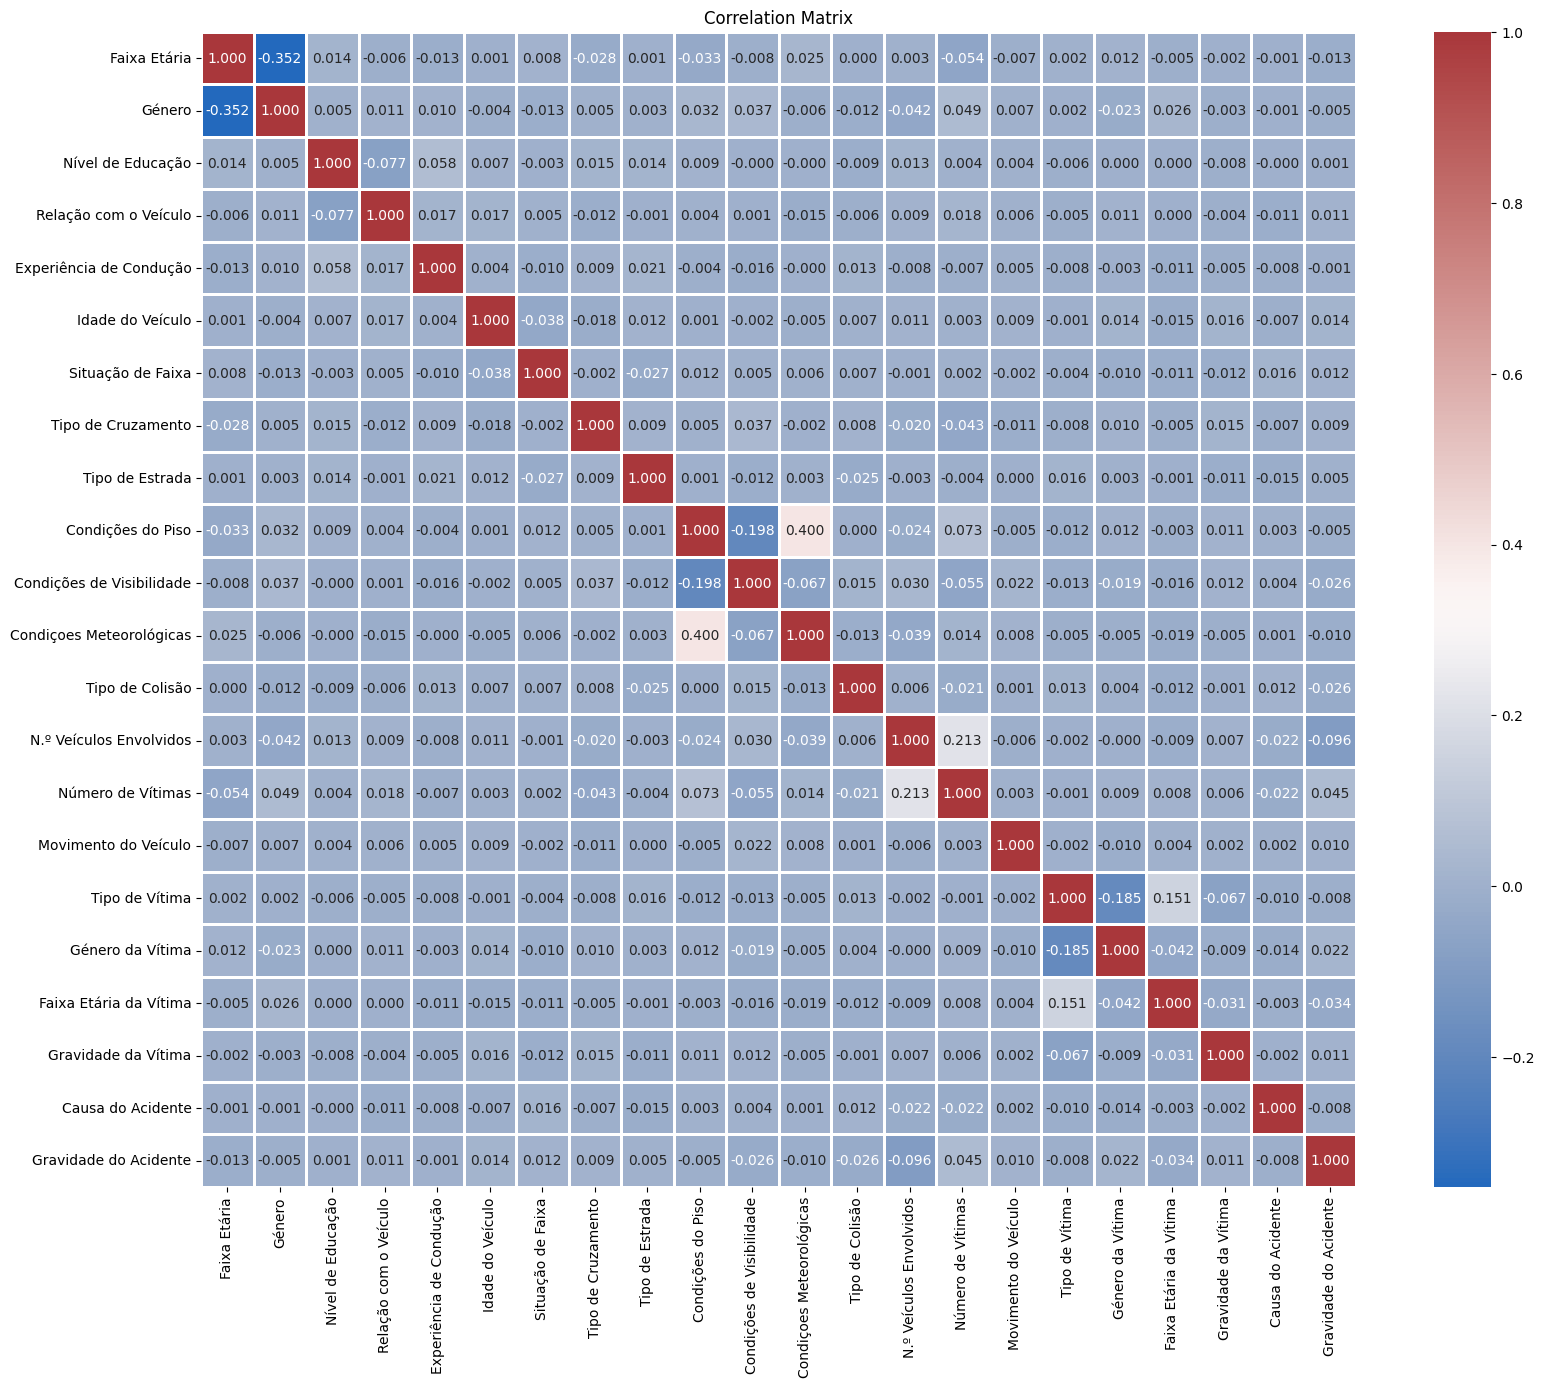

In [25]:
df = df_3.copy()

Gravidade_acidente_mapping = {'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2, }
df['Gravidade do Acidente'] = df['Gravidade do Acidente'].map(Gravidade_acidente_mapping)


label_encoder = LabelEncoder()  # aplicar Label Encoder a todas as colunas "object"
for column in df.select_dtypes(include = 'object').columns:
    df[column] = label_encoder.fit_transform(df[column])


correlation_matrix = df.corr()
plt.figure(figsize = (20, 15))
sns.heatmap(correlation_matrix, annot = True, cmap = 'vlag', fmt = ".3f", linewidths = 1, square=True)
plt.title('Correlation Matrix')
plt.show()


In [26]:
df

,Faixa Etária,Género,Nível de Educação,Relação com o Veículo,Experiência de Condução,Idade do Veículo,Situação de Faixa,Tipo de Cruzamento,Tipo de Estrada,Condições do Piso,Condições de Visibilidade,Condiçoes Meteorológicas,Tipo de Colisão,N.º Veículos Envolvidos,Número de Vítimas,Movimento do Veículo,Tipo de Vítima,Género da Vítima,Faixa Etária da Vítima,Gravidade da Vítima,Causa do Acidente,Gravidade do Acidente
0,0,1,0,0,0,3,2,1,0,0,3,2,3,2,2,2,2,0,1,2,9,0
1,1,1,4,0,3,2,4,1,0,0,3,2,8,2,2,2,1,1,3,2,16,0
2,0,1,4,0,0,1,6,1,0,0,3,2,2,2,2,2,0,1,1,2,0,1
3,0,1,4,0,2,5,6,7,2,0,0,2,8,2,2,2,2,0,0,2,1,0
4,0,1,4,0,1,2,6,7,0,0,0,2,8,2,2,2,0,1,0,1,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1,1,4,0,1,5,4,1,0,0,3,2,8,2,1,2,1,1,0,2,10,0
12312,4,1,1,0,2,0,2,1,0,0,3,2,8,2,1,4,1,1,1,1,10,0
12313,2,1,4,0,2,1,2,1,0,0,3,2,8,1,1,4,0,1,1,2,1,1
12314,0,0,4,0,3,1,4,1,0,0,0,2,8,2,1,4,2,0,2,2,5,0


De seguida, analisamos a importância de cada feature para o modelo 

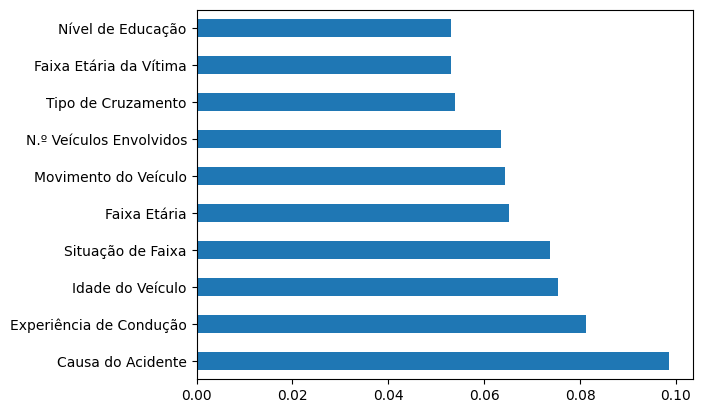

In [27]:
X = df.iloc[:, :-1].values # todas as features
Y =  df.iloc[:, -1].values # feature target

modelo = ExtraTreesClassifier()
modelo.fit(X, Y)

feature_importances = pd.Series(modelo.feature_importances_, index = df.columns[:-1])
feature_importances.nlargest(10).plot(kind='barh')  # mostrar as 10 features mais importantes

plt.show()

Neste ponto, dividimos os dados em sets de treino e de teste, utilizando 30% dos dados para teste e os restantes para teino

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 30)

print("Número de exemplos nos dados de treino: ", X_train.shape[0])
print("Número de exemplos nos dados de teste: ", X_test.shape[0])

Número de exemplos nos dados de treino:  8621
Número de exemplos nos dados de teste:  3695


### Parte 5 - Árvores de Decisão

O primeiro modelo de machine learning utilizado foi o modelo de árvores de decisão.


Primeiro vamos estanderizar as nossas features. Isso é feito para garantir que todas as características tenham a mesma escala, o que pode melhorar o desempenho do algoritmo. 

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Divisão por experiências:

 *  exp 1 - normal
 *  exp 2 - oversampling
 *  exp 3 - undersampling
 *  exp 4 - oversampling + undersampling
 *  exp 5 - SMOTE
 *  exp 6 - ADASYN

#### Part 5.1 - aplicar o método de forma normal

In [30]:
# O parâmetro max_depth = 4 define a profundidade máxima da árvore de decisão, 
# visto que limitar a profundidade pode ajudar a evitar overfitting, tornando a árvore mais simples.
# criterion: usamos a entropia porque é a que maximiza a informação ganha
clf_1 = DecisionTreeClassifier(random_state = 42, criterion = "entropy", max_depth = 4)
clf_1 = clf_1.fit(X_train, y_train)
# Treino: Arvore de Decisão
y_pred_1 = clf_1.predict(X_test)
y_train_pred_1 = clf_1.predict(X_train)


Train data accuracy:  0.8464215288249624
Test data accuracy:  0.8476319350473613
Decision tree accuracy:  0.8476319350473613


              precision    recall  f1-score   support

           0       0.85      0.99      0.92      3141
           1       0.30      0.01      0.03       501
           2       1.00      0.00      0.00        53

    accuracy                           0.85      3695
   macro avg       0.72      0.34      0.31      3695
weighted avg       0.78      0.85      0.78      3695



Como podemos observar no classification report, o recall e o f1-score são nulos o que mostra que o modelo não está a ser utilizado de uma forma correta. Como podemos observar, existe  desequilíbrio de classe no conjunto de dados, pois a classe '1' é significativamente menor do que as outras classes. Para tentar corrigir este erros, iremos usar técnicas de balanceamento de dados, como oversampling (aumentando o número de amostras da classe minoritária) ou undersampling (reduzindo o número de amostras da classe majoritária), para lidar com o desequilíbrio de classe.

Quando o train data accuracy é muito maior que o test data accuracy, significa que o modelo está a overfitting, ou seja, está a aprender demasiado bem os dados de treino e não está a generalizar bem para os dados de teste.


#### Part 5.2 - aplicar o método de oversampling

In [31]:

oversample = RandomOverSampler(sampling_strategy='minority')
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)

clf_2 = DecisionTreeClassifier(random_state = 42, criterion = "entropy", max_depth = 4)
clf_2 = clf_2.fit(X_train_resampled, y_train_resampled)

y_pred_2= clf_2.predict(X_test)
y_train_pred_2 = clf_2.predict(X_train)


#### Part 5.3 - aplicar o método de undersampling

In [32]:

undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)

clf_3 = DecisionTreeClassifier(random_state = 42, criterion = "entropy", max_depth = 4)
clf_3 = clf_3.fit(X_train_resampled, y_train_resampled)

y_pred_3= clf_3.predict(X_test)
y_train_pred_3= clf_3.predict(X_train)

#### Part 5.4 - aplicar o método de undersampling e oversampling

In [33]:
# Criando um pipeline com oversampling e undersampling
pipeline = Pipeline([
    ('over', RandomOverSampler(sampling_strategy='minority')),
    ('under', RandomUnderSampler(sampling_strategy='majority')),
])

# Aplicando o pipeline no conjunto de treino
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)
clf_4 = DecisionTreeClassifier(random_state = 42, criterion = "entropy", max_depth = 4)

clf_4.fit(X_train_resampled, y_train_resampled)

# Fazendo previsões
y_pred_4 = clf_4.predict(X_test)
y_train_pred_4 = clf_4.predict(X_train)


#### Part 5.5 - aplicar o método de SMOTE (Synthetic Minority Over-sampling Technique)

In [34]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

clf_5 = DecisionTreeClassifier(random_state = 42, criterion = "entropy", max_depth = 4)

# Treinando o classificador
clf_5.fit(X_train_resampled, y_train_resampled)

# Fazendo previsões
y_pred_5 = clf_5.predict(X_test)
y_train_pred_5= clf_5.predict(X_train)


#### Part 5.6 - aplicar método de ADASYN (Adaptive Synthetic Sampling)

In [39]:
adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

clf_6 = DecisionTreeClassifier(random_state = 42, criterion = "entropy", max_depth = 4)

# Treinando o classificador
clf_6.fit(X_train_resampled, y_train_resampled)

# Fazendo previsões
y_pred_6 = clf_6.predict(X_test)
y_train_pred_6 = clf_6.predict(X_train)


Agora vamos observar os diferentes classification_report

In [46]:
# Print dos valores accuracy

from tabulate import tabulate
import re

y_pred_todos=[]
y_pred_todos.extend([y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5, y_pred_6])

y_train_pred_todos=[]
y_train_pred_todos.extend([y_train_pred_1, y_train_pred_2, y_train_pred_3, y_train_pred_4, y_train_pred_5, y_train_pred_6])

for indice, (y_pred, y_train_pred) in enumerate(zip(y_pred_todos, y_train_pred_todos)):

    print('\nClassification_report -', indice + 1 ,'Experiência\n')
    print('Train data accuracy: ', accuracy_score(y_true = y_train, y_pred = y_train_pred))
    print('Test data accuracy: ', accuracy_score(y_true = y_test, y_pred = y_pred))
    print('Decision tree accuracy: ', accuracy_score(y_pred, y_test))
    print('\n')

    # Exemplo de classification report
    print(classification_report(y_test, y_pred, zero_division = 1))


    #Através do classification report, podemos concluir a acurácia do modelo tal como o recall, a precisão e o f1-score.


Classification_report - 1 Experiência

Train data accuracy:  0.8464215288249624
Test data accuracy:  0.8476319350473613
Decision tree accuracy:  0.8476319350473613


              precision    recall  f1-score   support

           0       0.85      0.99      0.92      3141
           1       0.30      0.01      0.03       501
           2       1.00      0.00      0.00        53

    accuracy                           0.85      3695
   macro avg       0.72      0.34      0.31      3695
weighted avg       0.78      0.85      0.78      3695


Classification_report - 2 Experiência

Train data accuracy:  0.7390093956617562
Test data accuracy:  0.7347767253044655
Decision tree accuracy:  0.7347767253044655


              precision    recall  f1-score   support

           0       0.86      0.85      0.86      3141
           1       0.58      0.03      0.05       501
           2       0.04      0.40      0.07        53

    accuracy                           0.73      3695
   macro avg 

Após estas várias experiências, decidimos que o método que apresenta melhores resultados é o ___, por isso agora vamos plotar a àrvore de decisão.

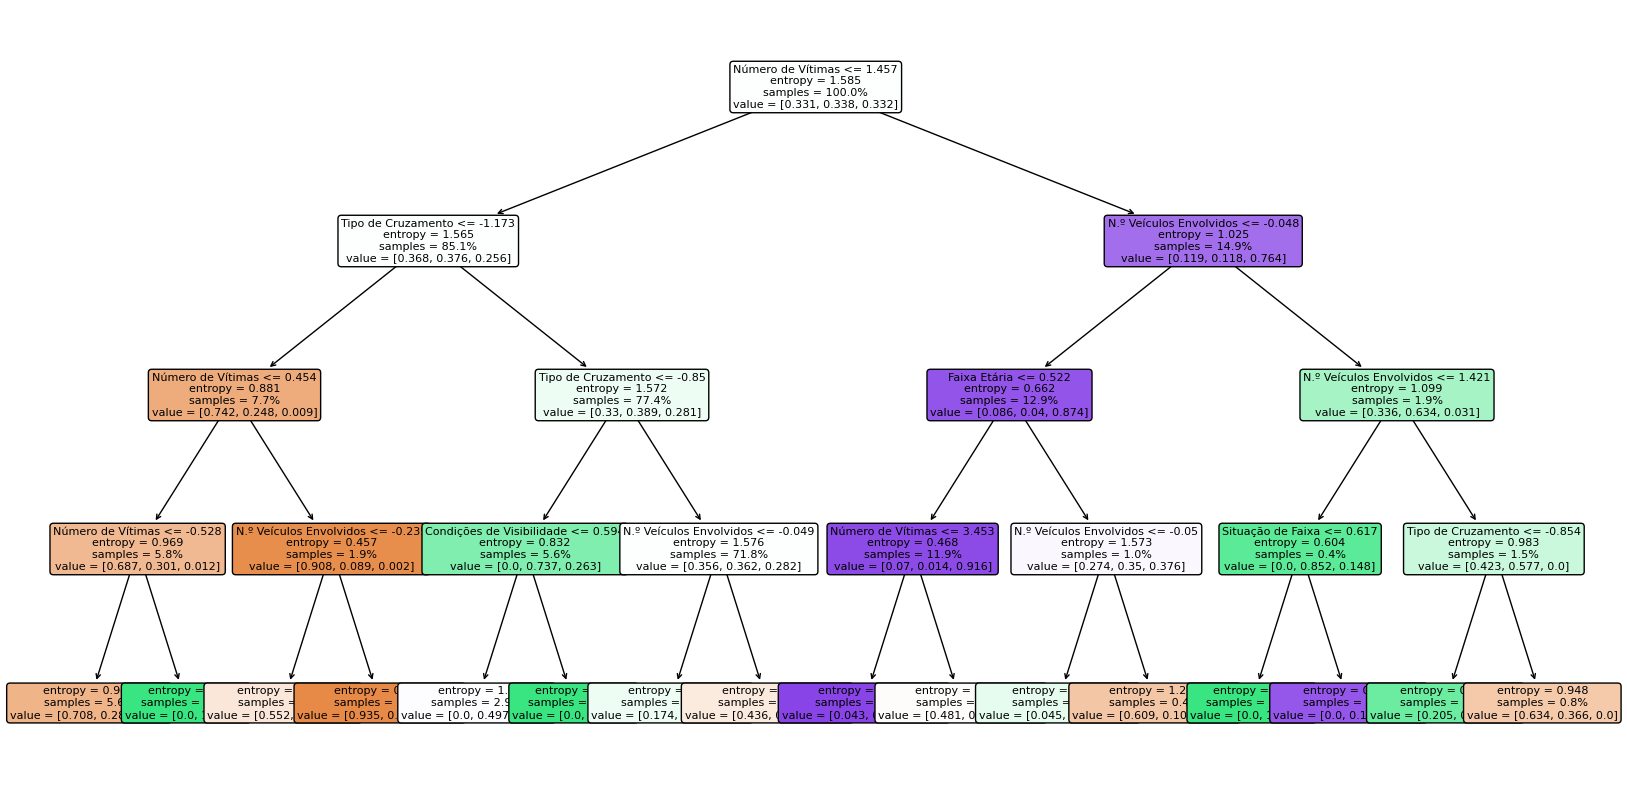

In [45]:
plt.figure(figsize = (20, 10))
tree.plot_tree(clf_6, fontsize = 8, feature_names = df.columns[:-1], filled = True, rounded = True, proportion=True)
plt.show()

Após realizar um classification report, vamos agora mostrar a matriz de confusão. Assim podemos ver a quantidade de falsos positivos e falsos negativos.

In [49]:
cf_matrix = confusion_matrix(y_test, y_train_pred_6)

ax = sns.heatmap(cf_matrix, annot = True, cmap = 'seismic', fmt = "4.0f")
ax.set_title('Seaborn Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted decision case disposition')
ax.set_ylabel('Actual decision case disposition ')

print(cf_matrix)

plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [3695, 8621]